## IMPORTS

In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
%matplotlib inline

## LOAD DATA

In [487]:
df = pd.read_csv("train.csv")
final_test_df = pd.read_csv("test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## DATA ANALYSIS

[Text(0, 0, 'Dead'), Text(0, 0, 'Survived')]

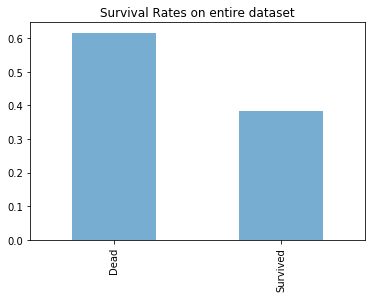

In [488]:
plt.title("Survival Rates on entire dataset")
bar=df["Survived"].value_counts(normalize=True).plot(kind="bar", alpha=0.6)
bar.set_xticklabels(["Dead", "Survived"])


#### Survival Rates based on sex

Text(0.5, 1.0, 'Survival Rate of diff Parch')

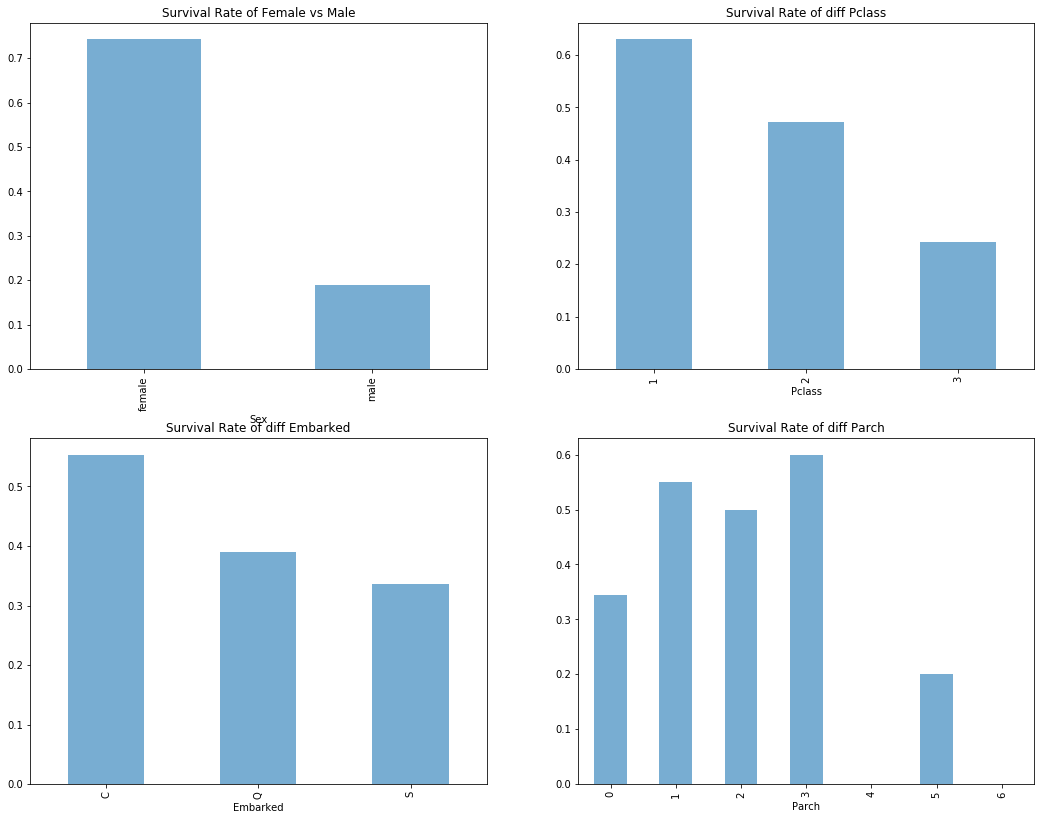

In [489]:
plt.figure(figsize=(18,14))
plt.subplot2grid((2,2),(0,0))
df.groupby(by="Sex", axis=0, as_index=True)["Survived"].mean().plot(kind="bar", alpha=0.6)
plt.title("Survival Rate of Female vs Male")

plt.subplot2grid((2,2),(0,1))
df.groupby(by="Pclass", axis=0, as_index=True)["Survived"].mean().plot(kind="bar", alpha=0.6)
plt.title("Survival Rate of diff Pclass")

plt.subplot2grid((2,2),(1,0))
df.groupby(by="Embarked", axis=0, as_index=True)["Survived"].mean().plot(kind="bar", alpha=0.6)
plt.title("Survival Rate of diff Embarked")

plt.subplot2grid((2,2),(1,1))
df.groupby(by="Parch", axis=0, as_index=True)["Survived"].mean().plot(kind="bar", alpha=0.6)
plt.title("Survival Rate of diff Parch")

## DATA CLEANUP

In [490]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [491]:
final_test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Replacing Nulls in Age and Embarked

In [492]:
datasets = [df, final_test_df]
for dataset in datasets:
    # generating random mean +- stdDev
    meanAge = dataset["Age"].mean()
    stdDeviation = dataset["Age"].std()
    rand_stdDeviation = random.randrange(math.floor(stdDeviation)) * random.choice([-1,1])
    dataset["Age"].fillna(meanAge, inplace=True)
    dataset["Embarked"].fillna(method="backfill", inplace=True)
    

In [531]:
# fixing one null value in fare col in final_test_df
final_test_df["Fare"].fillna(final_test_df["Fare"].mean(), inplace=True)

## FEATURE CREATION

### CREATING HAS_CABIN FEATURE BASED ON CABIN

In [493]:
for dataset in datasets:
    dataset["has_cabin"]=dataset["Cabin"].apply(lambda x: (1 if (type(x)==str) else 0))

### CREATING IS_CREW FEATURE BASED ON FARE==0

In [494]:
for dataset in datasets:
    dataset["is_crew_member"]=dataset["Fare"].apply(lambda x: 1 if (x==0) else 0)

### CREATING FAMILY_SIZE FEATURE BASED ON NO OF PARENTS AND SIBLINGS ON BOARD

In [495]:
def setFamilySizeFeature(d):
    a=[]
    for i in np.arange(d.shape[0]):
        familySize = d.iloc[i]["SibSp"] + d.iloc[i]["Parch"] + 1
        a.append(familySize)
    d["family_size"] = a

In [496]:
for dataset in datasets:
    setFamilySizeFeature(dataset)

### CREATING FEATURE IS_ALONE BASED ON FAMILY_SIZE

In [497]:
for dataset in datasets:
    dataset["is_alone"]=dataset["family_size"].apply(lambda x: 1 if (x==1) else 0)

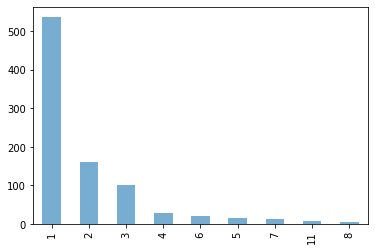

In [498]:
df["family_size"].value_counts().plot(kind="bar", alpha=0.6)

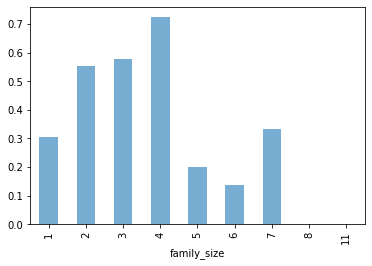

In [499]:
df.groupby("family_size")["Survived"].mean().plot(kind="bar", alpha=0.6)

### CREATING CABIN_BLOCK FEATURE BASED ON CABIN NO

In [500]:
for dataset in datasets:
    dataset["cabin_block"] = dataset["Cabin"].apply(lambda x: None if (type(x)==float) else x[0])

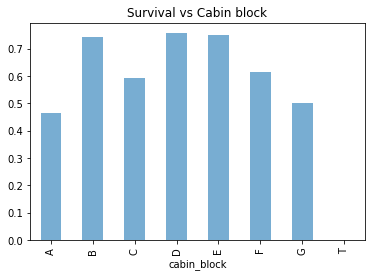

In [501]:
plt.title("Survival vs Cabin block")
df[df["Cabin"].notnull()].groupby(by="cabin_block", axis=0, as_index=True)["Survived"].mean().plot(kind="bar", alpha=0.6)

### CREATING FAMILY_TYPE FEATURE BASED ON FAMILY_SIZE ('SMALL/S'(1-4), 'MEDIUM/M'(5-7), LARGE/L(8,11))

In [502]:
def getFamilyType(size):
    if (size<=4):
        return 'S'
    elif (size>=8):
        return 'L'
    else:
        return 'M'

In [503]:
for dataset in datasets:
    dataset["family_type"] = dataset["family_size"].apply(getFamilyType)

In [504]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin,is_crew_member,family_size,is_alone,cabin_block,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,2,0,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,2,0,C,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,2,0,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,1,None,S


### ?? Should we make a split on Age. If yes where?

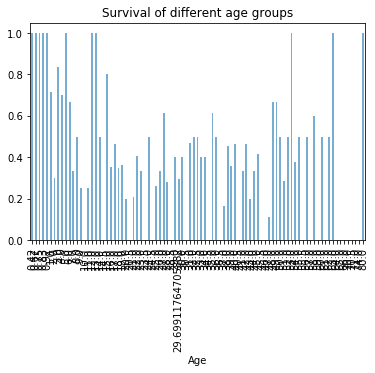

In [505]:
plt.title("Survival of different age groups")
df.groupby(by="Age", axis=0, as_index=True)["Survived"].mean().plot(kind="bar", alpha=0.6)

## ENCODING FOR CATEGORICAL FEATURES

In [506]:
# SEX
for dataset in datasets:
    dataset["n_Sex"]=dataset["Sex"].map({"male": 1, "female":0}).astype(int)

In [507]:
# Embarked
for dataset in datasets:
    dataset["n_Embarked"]=dataset["Embarked"].map({"S": 0, "C":1, "Q": 2}).astype(int)

In [508]:
# family_Type
for dataset in datasets:
    dataset["n_family_type"]=dataset["family_type"].map({"S": 0, "M":1, "L": 2}).astype(int)

In [509]:
# cabin_block
for dataset in datasets:
    dataset["n_cabin_block"]=dataset["cabin_block"].map({"A": 0, "B":1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7, None: 8}).astype(int)

## UNWANTED FEATURE DELETION

In [513]:
for dataset in datasets:
    dataset.drop(["Embarked", "Sex", "family_type", "Cabin", "PassengerId", "Name", "Ticket", "cabin_block"], axis=1, inplace=True)

In [514]:
final_test_df.head()

,Pclass,Age,SibSp,Parch,Fare,has_cabin,is_crew_member,family_size,is_alone,n_Sex,n_Embarked,n_family_type,n_cabin_block
0,3,34.5,0,0,7.8292,0,0,1,1,1,2,0,8
1,3,47.0,1,0,7.0000,0,0,2,0,0,0,0,8
2,2,62.0,0,0,9.6875,0,0,1,1,1,2,0,8
3,3,27.0,0,0,8.6625,0,0,1,1,1,0,0,8
4,3,22.0,1,1,12.2875,0,0,3,0,0,0,0,8


In [515]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,has_cabin,is_crew_member,family_size,is_alone,n_Sex,n_Embarked,n_family_type,n_cabin_block
0,0,3,22.0,1,0,7.2500,0,0,2,0,1,0,0,8
1,1,1,38.0,1,0,71.2833,1,0,2,0,0,1,0,2
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,8
3,1,1,35.0,1,0,53.1000,1,0,2,0,0,0,0,2
4,0,3,35.0,0,0,8.0500,0,0,1,1,1,0,0,8


## BUILDING THE DECISION TREE CLASSIFIER

In [611]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Splitting the data into train and test...

In [613]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=92)
df_train_target = df_train["Survived"]
df_train.drop(columns=["Survived"], axis=1, inplace=True)
df_test_target = df_test["Survived"]
df_test.drop(columns=["Survived"], axis=1, inplace=True);

In [784]:
# model = tree.DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators=100)
model.fit(pd.concat([df_train, df_test]), pd.concat([df_train_target, df_test_target]))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Scoring against test data

In [785]:
model.score(df_test, df_test_target)

0.9832402234636871

### Predicting for the problem data

In [786]:
final_test_df_copy = pd.read_csv("test.csv")

predictions = model.predict(final_test_df.values)
data = {
    "PassengerId": final_test_df_copy["PassengerId"],
    "Survived": predictions
}
result_df = pd.DataFrame(data)

In [787]:
result_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


### Writing results into file

In [788]:
result_df.to_csv('titanicPredictions_v9.csv', index=False)

In [792]:
a=[10,20,30]
a.insert(0,50)
aa

[50, 10, 20, 30]

In [798]:
a

[50, 10, 20]

In [797]:
a[len(a)-1]

20

In [799]:
b=[]
b.insert(0,1)
b.insert(0,2)
b.insert(0,3)
b

[3, 2, 1]

In [800]:
b.pop()

1

In [802]:
a=[]
a.indexo

ValueError: 2 is not in list